In [8]:
# %pip install scipy
# %pip install scikit-learn
# %pip install seaborn

import numpy as np
import seaborn as sns
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix


csv_path = "iris.csv"

In [11]:
def load_csv(csv_path:str) ->Tuple[np.ndarray,np.ndarray]:
    np.random.seed(42)
    dataset = np.genfromtxt(csv_path,delimiter=',')
    np.random.shuffle(dataset,)
    x,y = dataset[:,:-1],dataset[:,-1]
    return x,y

In [13]:
x,y = load_csv(csv_path)
x.shape, y.shape

((150, 4), (150,))

In [14]:
np.mean(x,axis=0), np.var(x, axis=0) 

(array([nan, nan, nan, nan]), array([nan, nan, nan, nan]))

In [15]:
np.nanmean(x, axis=0), np.nanvar(x, axis=0)

(array([ 355.46503497, -280.09189189,    2.95      ,   21.74726027]),
 array([1.73561968e+07, 1.18405444e+07, 1.51049922e+04, 6.11729208e+04]))

In [16]:
x[np.isnan(x)] = 3.5

In [17]:
np.where(x < 0.0)

(array([  4, 140]), array([2, 1]))

In [18]:
y = np.delete(y, np.where(x < 0.0)[0], axis=0)
y = np.delete(y, np.where(x > 10.0)[0], axis=0)
x = np.delete(x, np.where(x < 0.0)[0], axis=0)
x = np.delete(x, np.where(x > 10.0)[0], axis=0)
x.shape, y.shape

((144, 4), (144,))

In [19]:
def train_test_split(features:np.ndarray,
                     labels:np.ndarray,
                     test_split_ratio:float)->Tuple[np.ndarray,np.ndarray,np.ndarray,np.ndarray]:
    
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"
    
    x_train,y_train = features[:train_size, :], labels[:train_size]
    x_test,y_test = features[:train_size, :], labels[:train_size]
    return x_train, y_train, x_test, y_test

In [20]:
x_train, y_train, x_test, y_test = train_test_split(x,y,0.2)

In [29]:
def euclidean(points:np.ndarray,element_of_x:np.ndarray) -> np.ndarray:
    return np.sqrt(np.sum((points - element_of_x)**2,axis=1))

In [30]:
def predict(x_train:np.ndarray,y_train:np.ndarray,x_test:np.ndarray,k:int) -> np.ndarray:
    labels_pred = []
    for x_test_element in x_test:
        distances = euclidean(x_train,x_test_element)
        distances = np.array(sorted(zip(distances,y_train)))
        label_pred = mode(distances[:k,1],keepdims=False).mode
        labels_pred.append(label_pred)
    return np.array(labels_pred,dtype=np.int32)

In [31]:
y_preds = predict(x_train, y_train, x_test,3)
y_preds

array([1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1], dtype=int32)

In [32]:
def accuracy(y_test:np.ndarray, y_preds:np.ndarray)->float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100

In [33]:
accuracy(y_test, y_preds)

92.24137931034483

In [36]:
def plot_confusion_matrix(y_test:np.ndarray,y_preds:np.ndarray):
        conf_matrix = confusion_matrix(y_test,y_preds)
        sns.heatmap(conf_matrix,annot=True) 


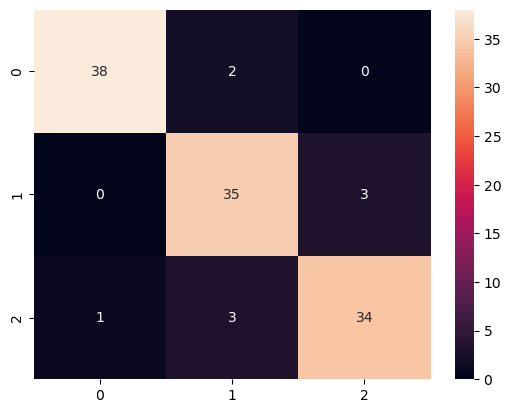

In [37]:
plot_confusion_matrix(y_test, y_preds)